# Visualisatie - opdrachten

In dit notebook vind je twee opdrachten.
- <a href="#vis_opdracht1"> Opdracht 1 </a>  maak je ter voorbereiding van het college.
- <a href="#vis_opdracht2"> Opdracht 2 </a> is voor in het college.

<a id="vis_opdracht1"></a>
## Opdracht 1

Maak onderstaande figuur met matplotlib:

<img src="vis_opdracht1.jpg" alt="Verkoop Oost-Azie" />

Merk op:

- De cijfers 1 t/m 7 hoef je niet te plotten :-)
- Maak gebruik van de functionaliteiten van matplotlib: ga dus niet zelf balkjes en lijntjes tekenen in Python!!
- Je kunt matplotlib op twee manieren gebruiken: als script of met objecten. Kies er een. Of doe ze allebei.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data
c_2005 = (20000, 18000, 15000, 24000)
c_2006 = (22000, 25000, 21000, 28000)
c_2007 = (25000, 23000, 24000, 30000)
index = np.arange(4)

#### Methode 1. Script

<BarContainer object of 2 artists>

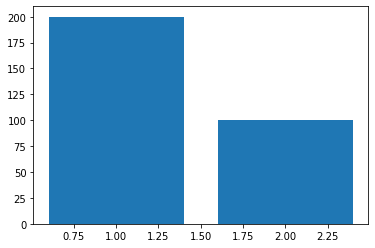

In [4]:
# Voorbeeld staafdiagram
plt.bar([1, 2], [200, 100])

#### Methode 2. Object-georienteerd

<a id="vis_opdracht2"></a>
## Opdracht 2 - vervolg toetsuitslagen

Tijdens college 4 hebben we gekeken naar de toetsuitslagen van een eerstejaarsvak. We gaan hier nu mee verder gaan de theorie van correlatie en visualisatie in de praktijk brengen.

Hiervoor introduceren we twee aanvullende datasets:
1. De toetsuitslagen van een tweede eerstejaarsvak: Computer Systems and Networks (CSN)
2. De klassenindeling



In [5]:
# Bibliotheken
from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

### Voorbereidingen

Voordat we starten met de extra opgaven, moeten we eerst de datasets inladen en de acties op de dataset van de vorige keer opnieuw uitvoeren.

In [6]:
# Naast de cijferlijst van PROG, laden we ook de cijferlijst van CSN in
uitslag_csn = pd.read_excel("uitslag_csn.xlsx")
uitslag_prog = pd.read_excel("uitslag_prog.xlsx")

In [7]:
# Code voor het hernoemen
columns=lambda x: x[1:]

replacements = {"Score." + str(i) : "Score." + str(i+1)  for i in range(1, 40)}
replacements["Score"] = "Score.1"

# Hernoemen van de columns van het dataframe
uitslag_prog.rename(columns=replacements, inplace=True)
uitslag_csn.rename(columns=replacements, inplace=True)

# Studentnummer herformatten
uitslag_prog['StudentNummer'] = uitslag_prog['StudentNummer'].astype('category')
uitslag_csn['StudentNummer'] = uitslag_csn['StudentNummer'].astype('category')

# Eindtijd herformatten
uitslag_prog['Eindtijd'] = pd.to_datetime(uitslag_prog['Eindtijd'])
uitslag_csn['Eindtijd'] = pd.to_datetime(uitslag_csn['Eindtijd'])

# Eindcijfers toevoegen
uitslag_prog['Cijfer'] = (9/30)*(uitslag_prog.sum(1) - 10) + 1
uitslag_prog['Eindcijfer'] = np.maximum( uitslag_prog['Cijfer'], [1]*uitslag_prog.shape[0] )
uitslag_csn['Cijfer'] = (9/30)*(uitslag_csn.sum(1) - 10) + 1
uitslag_csn['Eindcijfer'] = np.maximum( uitslag_csn['Cijfer'], [1]*uitslag_csn.shape[0] )

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

### Correlatie tussen CSN en PROG
We gaan kijken of er een correlatie is tussen de resultaten van studenten voor CSN en PROG. Is het zo dat studenten altijd een laag / gemiddeld / hoog cijfer halen voor zowel CSN als PROG? Of is er geen samenhang?


Bepaal of er een correlatie tussen de cijfers van CSN en PROG? Geef dat ook visueel weer. **Tip**: zorg ervoor dat studenten die niet aan beide toetsen hebben deelgenomen worden genegeerd. 


Hoeveel procent van de variabiliteit tussen de cijfers kunnen we verklaren met een linear verband?


### Klasgegevens
Er is een derde databestand beschikbaar met voor elke student diens klas. Extra informatie betekent extra mogelijkheden voor leuke analyses.

We moeten eerst de klassenlijst importeren en koppelen aan het uitslagen dataframe.

In [ ]:
# De klassenlijst laden we eerst in

klassenlijst = pd.read_excel("klassenindeling.xlsx")
klassenlijst.head()

In [ ]:
# Er zitten een aantal studenten dubbel in de dataset, die gaan we eerst verwijderen

klassenlijst.drop_duplicates(subset='StudentNummer',inplace=True)

In [ ]:
# Omdat we hier ons uitslagen dataframe gaan samenvoegen met de klassenlijst, is het handig om tot een
# gezamelijke index te komen. In ons geval is  StudentNummer een geschikte kandidaat.

uitslagen = uitslagen.set_index('StudentNummer')
klassenlijst = klassenlijst.set_index('StudentNummer')

In [ ]:
# We mergen de twee datasets tot een nieuwe dataset. 
# Helaas gaan hier een aantal studenten verloren: waarschijnlijk zijn er herkansers voor wie geen klas bekend is 

uitslagen_klas = pd.merge(uitslagen, klassenlijst, how='inner', on='StudentNummer') 


Een van de docenten vraagt zich af welke klas het *beste* is.

Maak een visualisatie waarmee in **één oogopslag** kunt zien welke klas het beste gescoord heeft op CSN én PROG.

**Tip:** denk eerst goed na *welk* type visualisatie hier het meest geschikt voor is, voordat je gaat knallen met MatplotLib...! 


Een van de docenten vindt het correlatiecoëfficient aan de lage kant. Hij vraagt zich af of er klassen zijn waar het coëfficient hoger is.

Maak een **interactieve** visualisatie waarmee de correlatie tussen de attributen `Eindcijfer_csn` en `Eindcijfer_prog` wordt getoond voor een of meerdere klassen. De visualisatie bij opgave 6.a was gebaseerd op de gehele dataset, de nieuwe visualisatie moet het mogelijk maken om een of meerdere klassen te selecteren en daarvoor de correlatie te tonen.

**Tip:** gebruik hiervoor HoloViews en de bokeh extension

In [ ]:
import holoviews as hv
hv.extension('bokeh')